In [1]:
import pandas as pd 
import numpy as np
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split 
from sklearn import metrics 
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE

Matplotlib is building the font cache; this may take a moment.


In [2]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')
print(df.head())


      id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   

   stroke  
0       1  
1       1  
2       1  
3       1  
4       1  


In [3]:
df.dropna(subset=['bmi','age', 'avg_glucose_level'], inplace=True)
print(df.head(15))

       id  gender   age  hypertension  heart_disease ever_married  \
0    9046    Male  67.0             0              1          Yes   
2   31112    Male  80.0             0              1          Yes   
3   60182  Female  49.0             0              0          Yes   
4    1665  Female  79.0             1              0          Yes   
5   56669    Male  81.0             0              0          Yes   
6   53882    Male  74.0             1              1          Yes   
7   10434  Female  69.0             0              0           No   
9   60491  Female  78.0             0              0          Yes   
10  12109  Female  81.0             1              0          Yes   
11  12095  Female  61.0             0              1          Yes   
12  12175  Female  54.0             0              0          Yes   
14   5317  Female  79.0             0              1          Yes   
15  58202  Female  50.0             1              0          Yes   
16  56112    Male  64.0           

(array([629., 751., 875., 980., 928., 746.]),
 array([8.00000000e-02, 1.37333333e+01, 2.73866667e+01, 4.10400000e+01,
        5.46933333e+01, 6.83466667e+01, 8.20000000e+01]),
 <BarContainer object of 6 artists>)

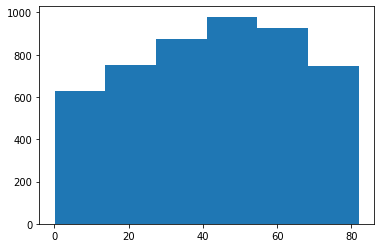

In [4]:
plt.hist(df['age'], bins=6)

In [5]:
gle = LabelEncoder()
gender_labels = gle.fit_transform(df['gender'])
gender_mappings = {index: label for index, label in 
                  enumerate(gle.classes_)}

residence_labels = gle.fit_transform(df['Residence_type'])
residence_mappings = {index: label for index, label in 
                  enumerate(gle.classes_)}

married_labels = gle.fit_transform(df['ever_married'])
married_mappings = {index: label for index, label in 
                  enumerate(gle.classes_)}

df['gender_label'] = gender_labels
df['residence_label'] = residence_labels
df['married_label'] = married_labels

print(df.head(10))

       id  gender   age  hypertension  heart_disease ever_married  \
0    9046    Male  67.0             0              1          Yes   
2   31112    Male  80.0             0              1          Yes   
3   60182  Female  49.0             0              0          Yes   
4    1665  Female  79.0             1              0          Yes   
5   56669    Male  81.0             0              0          Yes   
6   53882    Male  74.0             1              1          Yes   
7   10434  Female  69.0             0              0           No   
9   60491  Female  78.0             0              0          Yes   
10  12109  Female  81.0             1              0          Yes   
11  12095  Female  61.0             0              1          Yes   

        work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0         Private          Urban             228.69  36.6  formerly smoked   
2         Private          Rural             105.92  32.5     never smoked   
3     

(array([ 411., 1964., 1809.,  575.,  105.,   37.,    4.,    2.,    0.,
           2.]),
 array([10.3 , 19.03, 27.76, 36.49, 45.22, 53.95, 62.68, 71.41, 80.14,
        88.87, 97.6 ]),
 <BarContainer object of 10 artists>)

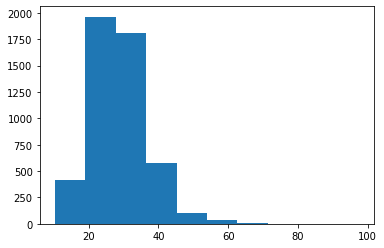

In [6]:
plt.hist(df['bmi'])

(array([4700.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
         209.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

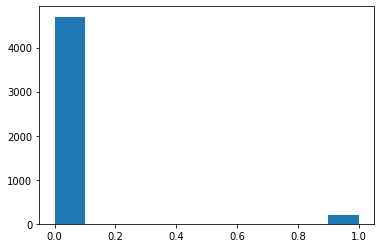

In [7]:
plt.hist(df['stroke'])

In [8]:
# building learning model 
features =[ 'hypertension', 'heart_disease', 'age', 'bmi', 'married_label', 'gender_label', 'residence_label', 'avg_glucose_level']
x = df[features]
y = df['stroke']

#splitting dataset into training and test set 
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

tree_clf = DecisionTreeClassifier()
reg_clf = LogisticRegression()
#clf = RandomForestClassifier()#n_estimators=10).fit(X_train, y_train)
#model = clf.fit(X_train, y_train)

sm = SMOTE(random_state=110)
X_train, y_train = sm.fit_resample(X_train, y_train)

# tree algorithm
tree_model = tree_clf.fit(X_train, y_train)
tree_y_predict= tree_model.predict(X_test)

print('Decision Tree ')
print(metrics.confusion_matrix(y_test, tree_y_predict))
print(metrics.accuracy_score(y_test, tree_y_predict))

# Logistic Regression 
reg_model = reg_clf.fit(X_train, y_train)
reg_y_predict= reg_model.predict(X_test)

print('\nLogistic Regression')
print(metrics.confusion_matrix(y_test, reg_y_predict))
print(metrics.accuracy_score(y_test, reg_y_predict))


Decision Tree 
[[1038  145]
 [  33   12]]
0.8550488599348535

Logistic Regression
[[902 281]
 [ 15  30]]
0.758957654723127


C:\Users\KUNAIN\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
